In [ ]:
# Setup and Installation
!git clone https://github.com/kexinhuang12345/DeepPurpose.git
%cd DeepPurpose
!pip install -r requirements.txt
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install pandas-flavor
!python setup.py install

Cloning into 'DeepPurpose'...
remote: Enumerating objects: 2973, done.
remote: Counting objects: 100% (568/568), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 2973 (delta 515), reused 484 (delta 484), pack-reused 2405 (from 1)
Receiving objects: 100% (2973/2973), 14.91 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (1910/1910), done.
/content/DeepPurpose
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 

In [ ]:
# Import Libraries
from DeepPurpose import utils, DTI
from DeepPurpose.dataset import load_process_DAVIS
import pandas as pd
import numpy as np
import os
import torch
import random
from sklearn.metrics import mean_squared_error
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import shutil
from google.colab import files

In [ ]:
# Reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Load DAVIS dataset
X_drug, X_target, y = load_process_DAVIS(path='./data/', binary=False, convert_to_log=True)
X_drug, X_target, y = X_drug[:5000], X_target[:5000], y[:5000]  # Subsample for speed

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


In [ ]:
# Define encoding strategies
drug_encodings = ['MPNN', 'Morgan', 'CNN']
target_encodings = ['CNN', 'AAC', 'Transformer']
results = []

Target Encodings (MPNN):   0%|          | 0/3 [00:00<?, ?it/s]


 Encoding: Drug=MPNN, Target=CNN
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.7778. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.49535. Total time 0.00222 hours
Training at Epoch 1 iteration 200 with loss 0.55231. Total time 0.00472 hours
Training at Epoch 1 iteration 300 with loss 0.09308. Total time 0.00611 hours
Training at Epoch 2 iteration 0 with loss 0.28723. Total time 0.00638 hours
Training at Epoch 2 iteration 100 with loss 0.50756. Total time 0.0075 hours
Training at Epoch 2 iteration 200 with loss 0.26448. Total time 0.00861 hours
Training at Epoch 2 iteration 300 with loss 1.09137. Total time 0.00972 hours
Training at Epoch 3 iteration 0 with 


Target Encodings (MPNN):  33%|███▎      | 1/3 [01:34<03:08, 94.36s/it]

Avg Score: 5.7568, MSE: 0.7714, Pearson: 0.3564

 Encoding: Drug=MPNN, Target=AAC
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 33.6098. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.05936. Total time 0.00027 hours
Training at Epoch 1 iteration 200 with loss 0.37377. Total time 0.00055 hours
Training at Epoch 1 iteration 300 with loss 0.51067. Total time 0.00083 hours
Training at Epoch 2 iteration 0 with loss 0.13472. Total time 0.00083 hours
Training at Epoch 2 iteration 100 with loss 0.26472. Total ti


Target Encodings (MPNN):  67%|██████▋   | 2/3 [02:49<01:23, 83.10s/it]

Avg Score: 5.6064, MSE: 0.6707, Pearson: 0.3821

 Encoding: Drug=MPNN, Target=Transformer
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.9879. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.54639. Total time 0.00083 hours
Training at Epoch 1 iteration 200 with loss 0.25655. Total time 0.00166 hours
Training at Epoch 1 iteration 300 with loss 1.10058. Total time 0.0025 hours
Training at Epoch 2 iteration 0 with loss 1.06534. Total time 0.00277 hours
Training at Epoch 2 iteration 100 with loss 1.10905. Total time 0.00361 hours
Training at Epoch 2 iteration 200 with loss 0.32276. Total time 0.00444 hours
Training at Epoch 2 iteration 300 with loss 1.20990. Total time


Drug Encodings:  33%|███▎      | 1/3 [03:55<07:51, 235.88s/it]

Avg Score: 5.4255, MSE: 0.6741, Pearson: 0.2732



Target Encodings (Morgan):   0%|          | 0/3 [00:00<?, ?it/s]


 Encoding: Drug=Morgan, Target=CNN
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379


[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator
[09:49:18] DEPRECATION WARNING: please use MorganGenerator


splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.5209. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.26259. Total time 0.00111 hours
Training at Epoch 1 iteration 200 with loss 0.15800. Total time 0.00194 hours
Training at Epoch 1 iteration 300 with loss 0.09470. Total time 0.00277 hours
Training at Epoch 2 iteration 0 with loss 0.15121. Total time 0.00305 hours
Training at Epoch 2 iteration 100 with loss 0.57255. Total time 0.00416 hours
Training at Epoch 2 iteration 200 with loss 2.61131. Total time 0.005 hours
Training at Epoch 2 iteration 300 with loss 0.45715. Total time 0.00611 hours
Training at Epoch 3 iteration 0 with loss 0.11498. Total time 0.00611 hours
Training at Epoch 3 iteration 100 with loss 1.54158. Total time 0.00722 hours
Training at Epoch 3 iteration 200 with loss 0.12185. Total time 0.00833 hours
Tr


Target Encodings (Morgan):  33%|███▎      | 1/3 [01:08<02:17, 68.90s/it]

Avg Score: 5.3849, MSE: 0.5515, Pearson: 0.4929

 Encoding: Drug=Morgan, Target=AAC
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.


[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator
[09:50:26] DEPRECATION WARNING: please use MorganGenerator


splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 26.3749. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.02516. Total time 0.0 hours
Training at Epoch 1 iteration 200 with loss 0.69367. Total time 0.00027 hours
Training at Epoch 1 iteration 300 with loss 0.30673. Total time 0.00055 hours
Training at Epoch 2 iteration 0 with loss 0.46907. Total time 0.00055 hours
Training at Epoch 2 iteration 100 with loss 0.32385. Total time 0.00083 hours
Training at Epoch 2 iteration 200 with loss 0.30858. Total time 0.00083 hours
Training at Epoch 2 iteration 300 with loss 0.39852. Total time 0.00111 hours
Training at Epoch 3 iteration 0 with loss 0.36119. Total time 0.00111 hours
Training at Epoch 3 iteration 100 with loss 0.76985. Total time 0.00138 hours
Training at Epoch 3 iteration 200 with loss 0.29907. Total time 0.00166 hours
Trai


Target Encodings (Morgan):  67%|██████▋   | 2/3 [02:19<01:09, 69.70s/it]

Avg Score: 5.6317, MSE: 0.5857, Pearson: 0.5269

 Encoding: Drug=Morgan, Target=Transformer
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379


[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator
[09:51:37] DEPRECATION WARNING: please use MorganGenerator


splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.5124. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.37675. Total time 0.00055 hours
Training at Epoch 1 iteration 200 with loss 1.07320. Total time 0.00138 hours
Training at Epoch 1 iteration 300 with loss 0.47051. Total time 0.00222 hours
Training at Epoch 2 iteration 0 with loss 0.80724. Total time 0.0025 hours
Training at Epoch 2 iteration 100 with loss 1.03516. Total time 0.00333 hours
Training at Epoch 2 iteration 200 with loss 0.95268. Total time 0.00416 hours
Training at Epoch 2 iteration 300 with loss 0.81262. Total time 0.005 hours
Training at Epoch 3 iteration 0 with loss 0.31110. Total time 0.005 hours
Training at Epoch 3 iteration 100 with loss 0.64093. Total time 0.00583 hours
Training at Epoch 3 iteration 200 with loss 0.75391. Total time 0.00666 hours
Train


Drug Encodings:  67%|██████▋   | 2/3 [07:05<03:28, 208.65s/it]

Avg Score: 5.3753, MSE: 0.5125, Pearson: 0.5479



Target Encodings (CNN):   0%|          | 0/3 [00:00<?, ?it/s]


 Encoding: Drug=CNN, Target=CNN
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.0179. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.64311. Total time 0.00111 hours
Training at Epoch 1 iteration 200 with loss 1.47272. Total time 0.0025 hours
Training at Epoch 1 iteration 300 with loss 0.18270. Total time 0.00388 hours
Training at Epoch 2 iteration 0 with loss 0.10701. Total time 0.00388 hours
Training at Epoch 2 iteration 100 with loss 1.33513. Total time 0.00527 hours
Training at Epoch 2 iteration 200 with loss 0.81491. Total time 0.00666 hours
Training at Epoch 2 iteration 300 with loss 0.47340. Total time 0.00777 hours
Training at Epoch 3 iteration 0 with loss 


Target Encodings (CNN):  33%|███▎      | 1/3 [01:30<03:01, 90.90s/it]

Avg Score: 5.3771, MSE: 0.5509, Pearson: 0.4970

 Encoding: Drug=CNN, Target=AAC
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 27.0306. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.12117. Total time 0.00027 hours
Training at Epoch 1 iteration 200 with loss 0.30796. Total time 0.00083 hours
Training at Epoch 1 iteration 300 with loss 1.15033. Total time 0.00138 hours
Training at Epoch 2 iteration 0 with loss 0.71020. Total time 0.00166 hours
Training at Epoch 2 iteration 100 with loss 0.40059. Total tim


Target Encodings (CNN):  67%|██████▋   | 2/3 [02:59<01:29, 89.62s/it]

Avg Score: 5.2602, MSE: 0.5368, Pearson: 0.5343

 Encoding: Drug=CNN, Target=Transformer
Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 12
encoding protein...
unique target sequence: 379
splitting dataset...
do not do train/test split on the data for already splitted data
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 27.3501. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.49072. Total time 0.00083 hours
Training at Epoch 1 iteration 200 with loss 0.97911. Total time 0.00194 hours
Training at Epoch 1 iteration 300 with loss 0.09222. Total time 0.00277 hours
Training at Epoch 2 iteration 0 with loss 1.71720. Total time 0.00305 hours
Training at Epoch 2 iteration 100 with loss 0.31266. Total time 0.00388 hours
Training at Epoch 2 iteration 200 with loss 0.20168. Total time 0.00472 hours
Training at Epoch 2 iteration 300 with loss 1.84852. Total time


Drug Encodings: 100%|██████████| 3/3 [11:07<00:00, 222.55s/it]

Avg Score: 5.3511, MSE: 0.5718, Pearson: 0.4642


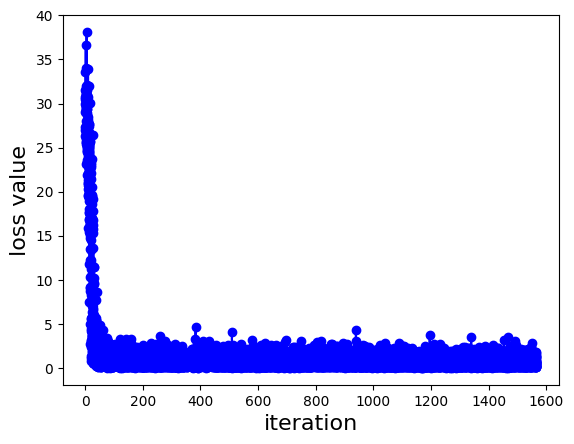

In [ ]:
# Train & Evaluate Models
for drug_encoding in tqdm(drug_encodings, desc="Drug Encodings"):
    for target_encoding in tqdm(target_encodings, desc=f"Target Encodings ({drug_encoding})", leave=False):
        print(f'\n Encoding: Drug={drug_encoding}, Target={target_encoding}')
        result_folder = f'results_{drug_encoding}_{target_encoding}'
        os.makedirs(result_folder, exist_ok=True)

        # Remove the device argument from generate_config
        config = utils.generate_config(drug_encoding=drug_encoding,
                                       target_encoding=target_encoding,
                                       cls_hidden_dims=[1024, 1024, 512],
                                       train_epoch=5,
                                       LR=1e-4,
                                       batch_size=16,
                                       result_folder=result_folder)

        data = utils.data_process(X_drug=X_drug, X_target=X_target, y=y,
                                  drug_encoding=drug_encoding,
                                  target_encoding=target_encoding,
                                  split_method='no_split')

        # The device is passed to model_initialize or handled internally by DeepPurpose
        model = DTI.model_initialize(**config)
        model.train(data)

        with torch.no_grad():
            preds = model.predict(data)

        mse = mean_squared_error(y, preds)
        pearson_corr = scipy.stats.pearsonr(y, preds)[0]
        avg_score = np.mean(preds)

        print(f'Avg Score: {avg_score:.4f}, MSE: {mse:.4f}, Pearson: {pearson_corr:.4f}')

        # Save predictions
        df = pd.DataFrame({'Drug': X_drug, 'Target': X_target, 'Y_True': y, 'Y_Predicted': preds})
        df.to_csv(f'{result_folder}/predicted_{drug_encoding}_{target_encoding}.csv', index=False)

        results.append((drug_encoding, target_encoding, avg_score, mse, pearson_corr))

In [ ]:
# Save results summary
df_summary = pd.DataFrame(results, columns=['Drug_Encoding', 'Target_Encoding', 'Avg_Pred_Score', 'MSE', 'Pearson_Correlation'])
df_summary.to_csv('encoding_summary.csv', index=False)
print("Saved: encoding_summary.csv")

Saved: encoding_summary.csv


In [ ]:
# Visualize & Export Results
pdf_path = "DeepPurpose_Visual_Report.pdf"
with PdfPages(pdf_path) as pdf:
    # Pearson Correlation Heatmap
    plt.figure(figsize=(8, 6))
    heatmap_data = df_summary.pivot(index='Drug_Encoding', columns='Target_Encoding', values='Pearson_Correlation')
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f')
    plt.title('Pearson Correlation Heatmap')
    pdf.savefig(); plt.close()

    # MSE Heatmap
    plt.figure(figsize=(8, 6))
    heatmap_data = df_summary.pivot(index='Drug_Encoding', columns='Target_Encoding', values='MSE')
    sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='.3f')
    plt.title('MSE Heatmap')
    pdf.savefig(); plt.close()

    # Barplot of Avg Prediction Score
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_summary, x='Drug_Encoding', y='Avg_Pred_Score', hue='Target_Encoding')
    plt.title('Average Prediction Score per Encoding')
    plt.tight_layout()
    pdf.savefig(); plt.close()

    # Results Table
    plt.figure(figsize=(12, 2))
    plt.axis('off')
    table = plt.table(cellText=df_summary.round(3).values,
                      colLabels=df_summary.columns,
                      cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    pdf.savefig(); plt.close()

    # Version Info
    plt.figure(figsize=(12, 2))
    plt.axis('off')
    plt.text(0.1, 0.5, f"Generated using DeepPurpose\nTorch version: {torch.__version__}", fontsize=10)
    pdf.savefig(); plt.close()

print("Saved: DeepPurpose_Visual_Report.pdf")

Saved: DeepPurpose_Visual_Report.pdf


In [ ]:
# Best Encoding Combo
best_model = df_summary.sort_values(by='Pearson_Correlation', ascending=False).iloc[0]
print("\n Best Encoding Combination:")
print(best_model)


 Best Encoding Combination:
Drug_Encoding               Morgan
Target_Encoding        Transformer
Avg_Pred_Score            5.375302
MSE                       0.512466
Pearson_Correlation       0.547857
Name: 5, dtype: object


In [ ]:
# Download All Outputs
files.download("encoding_summary.csv")
files.download("DeepPurpose_Visual_Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>